In [1]:
import pandas as pd
data = pd.read_csv("dataset.csv")
data = data.sample(n=50,replace=False)
data.to_csv("sample.csv",index=False)

In [2]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

#text normalization function
%run ./Text_Normalization_Function.ipynb

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhangly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zhangly\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zhangly\AppData\Roaming\nltk_data...
[nltk_data]   Package av

[nltk_data]   Package wordnet is already up-to-date!
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 fee

In [45]:
df = pd.read_csv("steam_sample.csv")

In [17]:
df.head()

,app_id,app_name,review_text,review_score,review_votes
0,251570,7 Days to Die,Early Access Review,1,0
1,226840,Age of Wonders III,Loved the old game and love this new one! Grap...,1,0
2,453960,Envy the Dead,"Could be good, though kind of isn't. plenty of...",1,0
3,2990,FlatOut 2,easily one of the best racing games I've ever ...,1,1
4,8930,Sid Meier's Civilization V,"It's an exhausting game to play, but once you ...",1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283421 entries, 0 to 1283420
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   app_id        1283421 non-null  int64 
 1   app_name      1246879 non-null  object
 2   review_text   1282020 non-null  object
 3   review_score  1283421 non-null  int64 
 4   review_votes  1283421 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 49.0+ MB


In [19]:
reviews = np.array(df['review_text'].astype(str))

In [46]:
df["review_score"].replace(1, "positive", inplace=True)
df["review_score"].replace(-1, "negative", inplace=True)

In [28]:
polarity = np.array(df['review_score'])

# Data Description

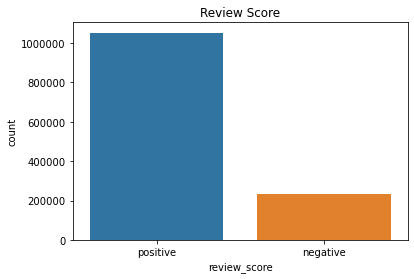

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Review Score
sns.countplot(x="review_score", data=df).set_title('Review Score')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

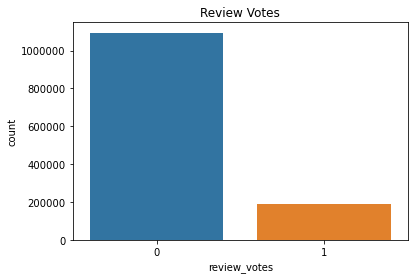

In [85]:
# Review Votes
sns.countplot(x="review_votes", data=df).set_title('Review Votes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

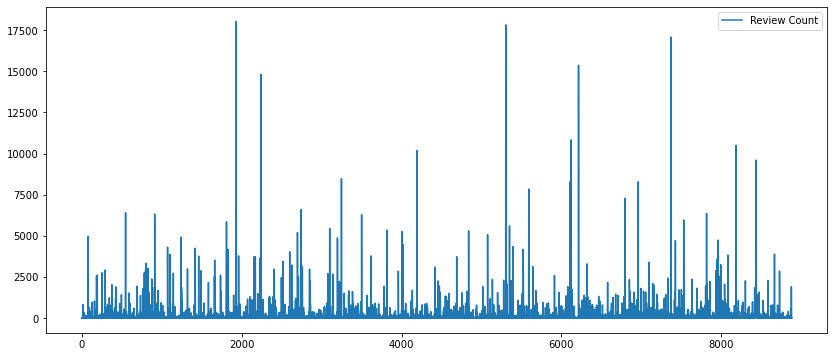

In [86]:
# Number of reviews per game
df.groupby("app_name", as_index=False)["review_score"].count().rename(columns={'review_score':'Review Count'}).plot(figsize=(14,6))
plt.show()

# VADER Lexicon-Based Sentiment Analysis

In [20]:
normalized_reviews = normalize_corpus(reviews)

In [21]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zhangly\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [22]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound']  

In [23]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df.head()                                                    

,VADER Polarity,VADER Score
0,negative,0.0000
1,positive,0.9238
2,positive,0.7003
3,positive,0.9442
4,positive,0.9962


In [30]:
# Find the best threshold value with highest accuracy
from sklearn import metrics

def try_threshold_for_accuracy(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(polarity, VADER_binary_polarity)
    return(accuracy) 

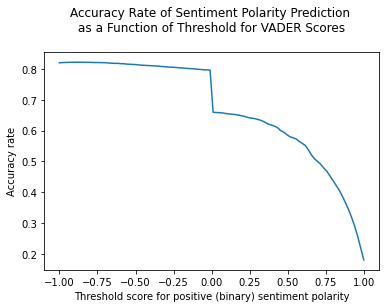

In [32]:
thresholds = np.linspace(-1,1,100)
acc_rates = [try_threshold_for_accuracy(VADER_polarity_df['VADER Score'],threshold) for threshold in thresholds]

import matplotlib.pyplot as plt

plt.plot(thresholds, acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

In [33]:
thresholds[acc_rates.index(max(acc_rates))]

-0.8787878787878788

In [34]:
VADER_polarity = [analyze_sentiment_vader_lexicon(review, threshold=thresholds[acc_rates.index(max(acc_rates))]) for review in reviews]
VADER_polarity_df = pd.DataFrame(VADER_polarity, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_df.head()       

,VADER Polarity,VADER Score
0,positive,0.0000
1,positive,0.9238
2,positive,0.7003
3,positive,0.9442
4,positive,0.9962


In [35]:
print('Accuracy Rate:', np.round(metrics.accuracy_score(polarity, 
                                 VADER_polarity_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.821 



In [36]:
# confusion matrix
pd.crosstab(pd.Series(polarity), 
            pd.Series(VADER_polarity_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,17195,214103,231298
positive,15028,1037095,1052123
All,32223,1251198,1283421


In [49]:
full = pd.concat([df,VADER_polarity_df],axis=1)
full.head()

,app_id,app_name,review_text,review_score,review_votes,VADER Polarity,VADER Score
0,251570,7 Days to Die,Early Access Review,positive,0,positive,0.0000
1,226840,Age of Wonders III,Loved the old game and love this new one! Grap...,positive,0,positive,0.9238
2,453960,Envy the Dead,"Could be good, though kind of isn't. plenty of...",positive,0,positive,0.7003
3,2990,FlatOut 2,easily one of the best racing games I've ever ...,positive,1,positive,0.9442
4,8930,Sid Meier's Civilization V,"It's an exhausting game to play, but once you ...",positive,0,positive,0.9962


In [50]:
full.to_csv("steam_sentiment.csv",index=False)

In [92]:
full.groupby(["app_name"])["VADER Polarity"].value_counts().to_frame()

,,VADER Polarity
app_name,VADER Polarity,
神明的一天世界-God's One Day World,positive,2
! That Bastard Is Trying To Steal Our Gold !,positive,6
"!""We Are The Dwarves""!",positive,10
"""Glow Ball"" - The billiard puzzle game",positive,4
#SelfieTennis,positive,12
...,...,...
vrAMP,positive,5
ルナティックドーン レジェンドパック,positive,1
侠客风云传(Tale of Wuxia),positive,36


In [139]:
# Calculate the mean VADER score for each game
full.groupby(["app_name"])["VADER Score"].mean().to_frame().sort_values(by="VADER Score",ascending=True)

,VADER Score
app_name,
Run The Gamut,-0.9970
Snow Light,-0.9960
Hard to Be a God,-0.9960
My Best Friends - Cats & Dogs,-0.9959
A Verdant Hue,-0.9908
...,...
Ghost Cleaner,0.9966
Slap Village - Reality Slap,0.9973
SMILE GAME BUILDER,0.9976


In [97]:
# Filter out the number of negative reviews for each game
negative_reviews_count = full.groupby(["app_name"])["VADER Polarity"].value_counts().to_frame().filter(like="negative",axis=0)
negative_reviews_count

,,VADER Polarity
app_name,VADER Polarity,
10 Minute Barbarian,negative,1
10 Second Ninja,negative,1
"10,000,000",negative,4
100% Orange Juice,negative,16
1000 Amps,negative,1
...,...,...
samurai_jazz,negative,3
the static speaks my name,negative,23
theHunter Classic,negative,73


In [99]:
# Extract the number
negative_reviews_count["Negative_Reviews_Count"]=negative_reviews_count["VADER Polarity"].map(lambda x: str(x).split(" ", 2)[0])
# Sort out the games with the highest number of negative reviews
negative_reviews_count.sort_values(by="Negative_Reviews_Count",ascending=False,inplace=True)
negative_reviews_count.head()

,,VADER Polarity,Negative_Reviews_Count
app_name,VADER Polarity,,
Total War: ATTILA,negative,99,99
Don't Starve,negative,98,98
BioShock Infinite,negative,97,97
POSTAL 2,negative,97,97
Nether,negative,96,96


In [111]:
# Find out the games with the highest percentgae of negative reviews
negative_reviews_percentage = full.groupby(["app_name"])["VADER Polarity"].value_counts(normalize=True).to_frame().filter(like="negative",axis=0)
negative_reviews_percentage["Negative_Reviews_Percentage"]=negative_reviews_percentage["VADER Polarity"].map(lambda x: str(x).split(" ", 2)[0])
negative_reviews_percentage.sort_values(by="Negative_Reviews_Percentage",ascending=False,inplace=True)

In [115]:
# Summary of negative reviews
negative_reviews_summary = pd.merge(
    negative_reviews_count, negative_reviews_percentage, how="inner", on="app_name")[["Negative_Reviews_Count","Negative_Reviews_Percentage"]]
negative_reviews_summary.sort_values(by=["Negative_Reviews_Count","Negative_Reviews_Percentage"],ascending=[False,False])

,Negative_Reviews_Count,Negative_Reviews_Percentage
app_name,,
Total War: ATTILA,99,0.08505154639175258
Don't Starve,98,0.031150667514303877
POSTAL 2,97,0.0467695274831244
BioShock Infinite,97,0.015343245808288516
The Evil Within,96,0.1566068515497553
...,...,...
Call of Duty 4: Modern Warfare,1,0.0014044943820224719
DLC Quest,1,0.0013297872340425532
Tropico 4,1,0.0013123359580052493


In [117]:
# Word Cloud
import collections
from collections import Counter
from wordcloud import WordCloud 

def WordCloud_generator(data, title=None):
    
    # Keep top 1000 most frequent words
    most_freq = Counter(data).most_common(1000) 
    text = ' '.join([x[0] for x in most_freq])
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10,
                          collocations=False
                         ).generate(text)

    # plot the Word Cloud                      
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

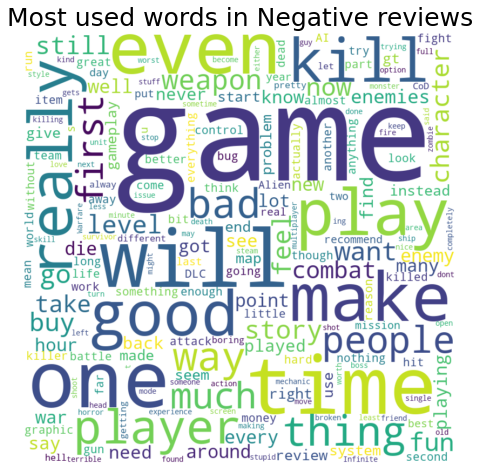

In [118]:
# Most used words in predicted negative reviews
WordCloud_generator(full[full["VADER Polarity"]=="negative"]["review_text"], title="Most used words in Negative reviews")

# Supervised Machine Learning

In [123]:
df_normalize = df
df_normalize["normalized_review_text"] = normalized_reviews
df_normalize

,app_id,app_name,review_text,review_score,review_votes,normalized_review_text
0,251570,7 Days to Die,Early Access Review,positive,0,early access review
1,226840,Age of Wonders III,Loved the old game and love this new one! Grap...,positive,0,love old game love new graphic battle vastly i...
2,453960,Envy the Dead,"Could be good, though kind of isn't. plenty of...",positive,0,could good though kind plenty bug though idea ...
3,2990,FlatOut 2,easily one of the best racing games I've ever ...,positive,1,easily best racing game ever play amaze soundt...
4,8930,Sid Meier's Civilization V,"It's an exhausting game to play, but once you ...",positive,0,exhausting game play bnw expansion best strate...
...,...,...,...,...,...,...
1283416,265300,Lords Of The Fallen,Cannot progress after guardian boss. I enter t...,negative,0,progress guardian bos enter stage already dead...
1283417,49520,Borderlands 2,Claptrap is awful and inescapable.,negative,0,claptrap awful inescapable
1283418,238960,Path of Exile,diablo 3 isn't as fun as diablo 2. this is kin...,negative,0,diablo fun diablo kinda diablo steroid miss ch...
1283419,253710,theHunter Classic,hard but is good game after a while,positive,0,hard good game


In [124]:
from sklearn.cross_validation import train_test_split
train, test = train_test_split(df_normalize, test_size = 0.3)

In [127]:
normalized_train_reviews = np.array(train["normalized_review_text"])
train_polarity = np.array(train["review_score"])

normalized_test_reviews = np.array(test["normalized_review_text"])
test_polarity = np.array(test["review_score"])

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (1,2)) 
feature_matrix_TRAIN = vectorizer.fit_transform(normalized_train_reviews).astype(float)

In [130]:
# Vectorize test data using the features created based on the training data
feature_matrix_TEST = vectorizer.transform(normalized_test_reviews)

In [131]:
# use Support Vector Machines (SVM) to train sentiment classifier
from sklearn import linear_model

svm = linear_model.SGDClassifier(loss='hinge', random_state = 0) 
svm.fit(feature_matrix_TRAIN,train_polarity)
predicted_svm = svm.predict(feature_matrix_TEST) 

In [132]:
print('Accuracy rate:', np.round(metrics.accuracy_score(test_polarity, predicted_svm), 3))

Accuracy rate: 0.831


The accuracy rate of the SVM-based sentiment classifier is a little higher than that of the lexicon-based sentiment classifier.